### Toymodel Train Test Evaluation

In [1]:
%load_ext autoreload
%autoreload 2
import numpy as np
import torch
from torch import nn
from mapsgan import cLRSolver, BicycleGenerator, ToyGenerator, ToyDiscriminator, data_loader
import mapsgan.experiments as experiments
from mapsgan.evaluation import Visualization
%env CUDA_VISIBLE_DEVICES=0

env: CUDA_VISIBLE_DEVICES=0


#### Set up dataloader, model, solver

In [2]:
experiment = experiments.ETH() # we store filepaths and arguments in here
dataset, trainloader = data_loader(in_len=8, out_len=12, batch_size=64, num_workers=1, path=experiment.test_dir,
                                  shuffle=True)
_, testloader = data_loader(in_len=8, out_len=12, batch_size=1, num_workers=1, path=experiment.test_dir,
                                  shuffle=False)

In [21]:
generator = BicycleGenerator(generator=ToyGenerator, start_mode='clr')
discriminator = ToyDiscriminator()

In [25]:
solver = cLRSolver(generator, discriminator, 
                loss_fns={'traj': nn.L1Loss, 'disc': nn.BCEWithLogitsLoss, 'z':nn.L1Loss},
                optims_args={'generator': {'lr': 1e-3}, 'discriminator': {'lr': 1e-6}, 'encoder':{'lr':1e-6}})

#### Training

In [26]:
solver.train(trainloader, epochs = 1000, checkpoint_every=10, print_every=10, val_every=10, testloader=testloader, steps = {'generator': 1, 'discriminator': 1})

Training new model

       Generator Losses    Discriminator Losses
Epochs G_BCE     G_L1z     D_Real    D_Fake    
1000   0.653     0.852     0.640     0.864     


Process Process-1311:
Traceback (most recent call last):
  File "/home/yy/anaconda3/envs/mapsgan/lib/python3.6/multiprocessing/process.py", line 249, in _bootstrap
    self.run()
  File "/home/yy/anaconda3/envs/mapsgan/lib/python3.6/multiprocessing/process.py", line 93, in run
    self._target(*self._args, **self._kwargs)


KeyboardInterrupt: 

  File "/home/yy/anaconda3/envs/mapsgan/lib/python3.6/site-packages/torch/utils/data/dataloader.py", line 96, in _worker_loop
    r = index_queue.get(timeout=MANAGER_STATUS_CHECK_INTERVAL)
  File "/home/yy/anaconda3/envs/mapsgan/lib/python3.6/multiprocessing/queues.py", line 104, in get
    if timeout < 0 or not self._poll(timeout):
  File "/home/yy/anaconda3/envs/mapsgan/lib/python3.6/multiprocessing/connection.py", line 257, in poll
    return self._poll(timeout)
  File "/home/yy/anaconda3/envs/mapsgan/lib/python3.6/multiprocessing/connection.py", line 414, in _poll
    r = wait([self], timeout)
  File "/home/yy/anaconda3/envs/mapsgan/lib/python3.6/multiprocessing/connection.py", line 911, in wait
    ready = selector.select(timeout)
  File "/home/yy/anaconda3/envs/mapsgan/lib/python3.6/selectors.py", line 376, in select
    fd_event_list = self._poll.poll(timeout)
KeyboardInterrupt


#### Test

In [10]:
output = solver.test(testloader)

#### Evaluation
visualization of predicted trajectories

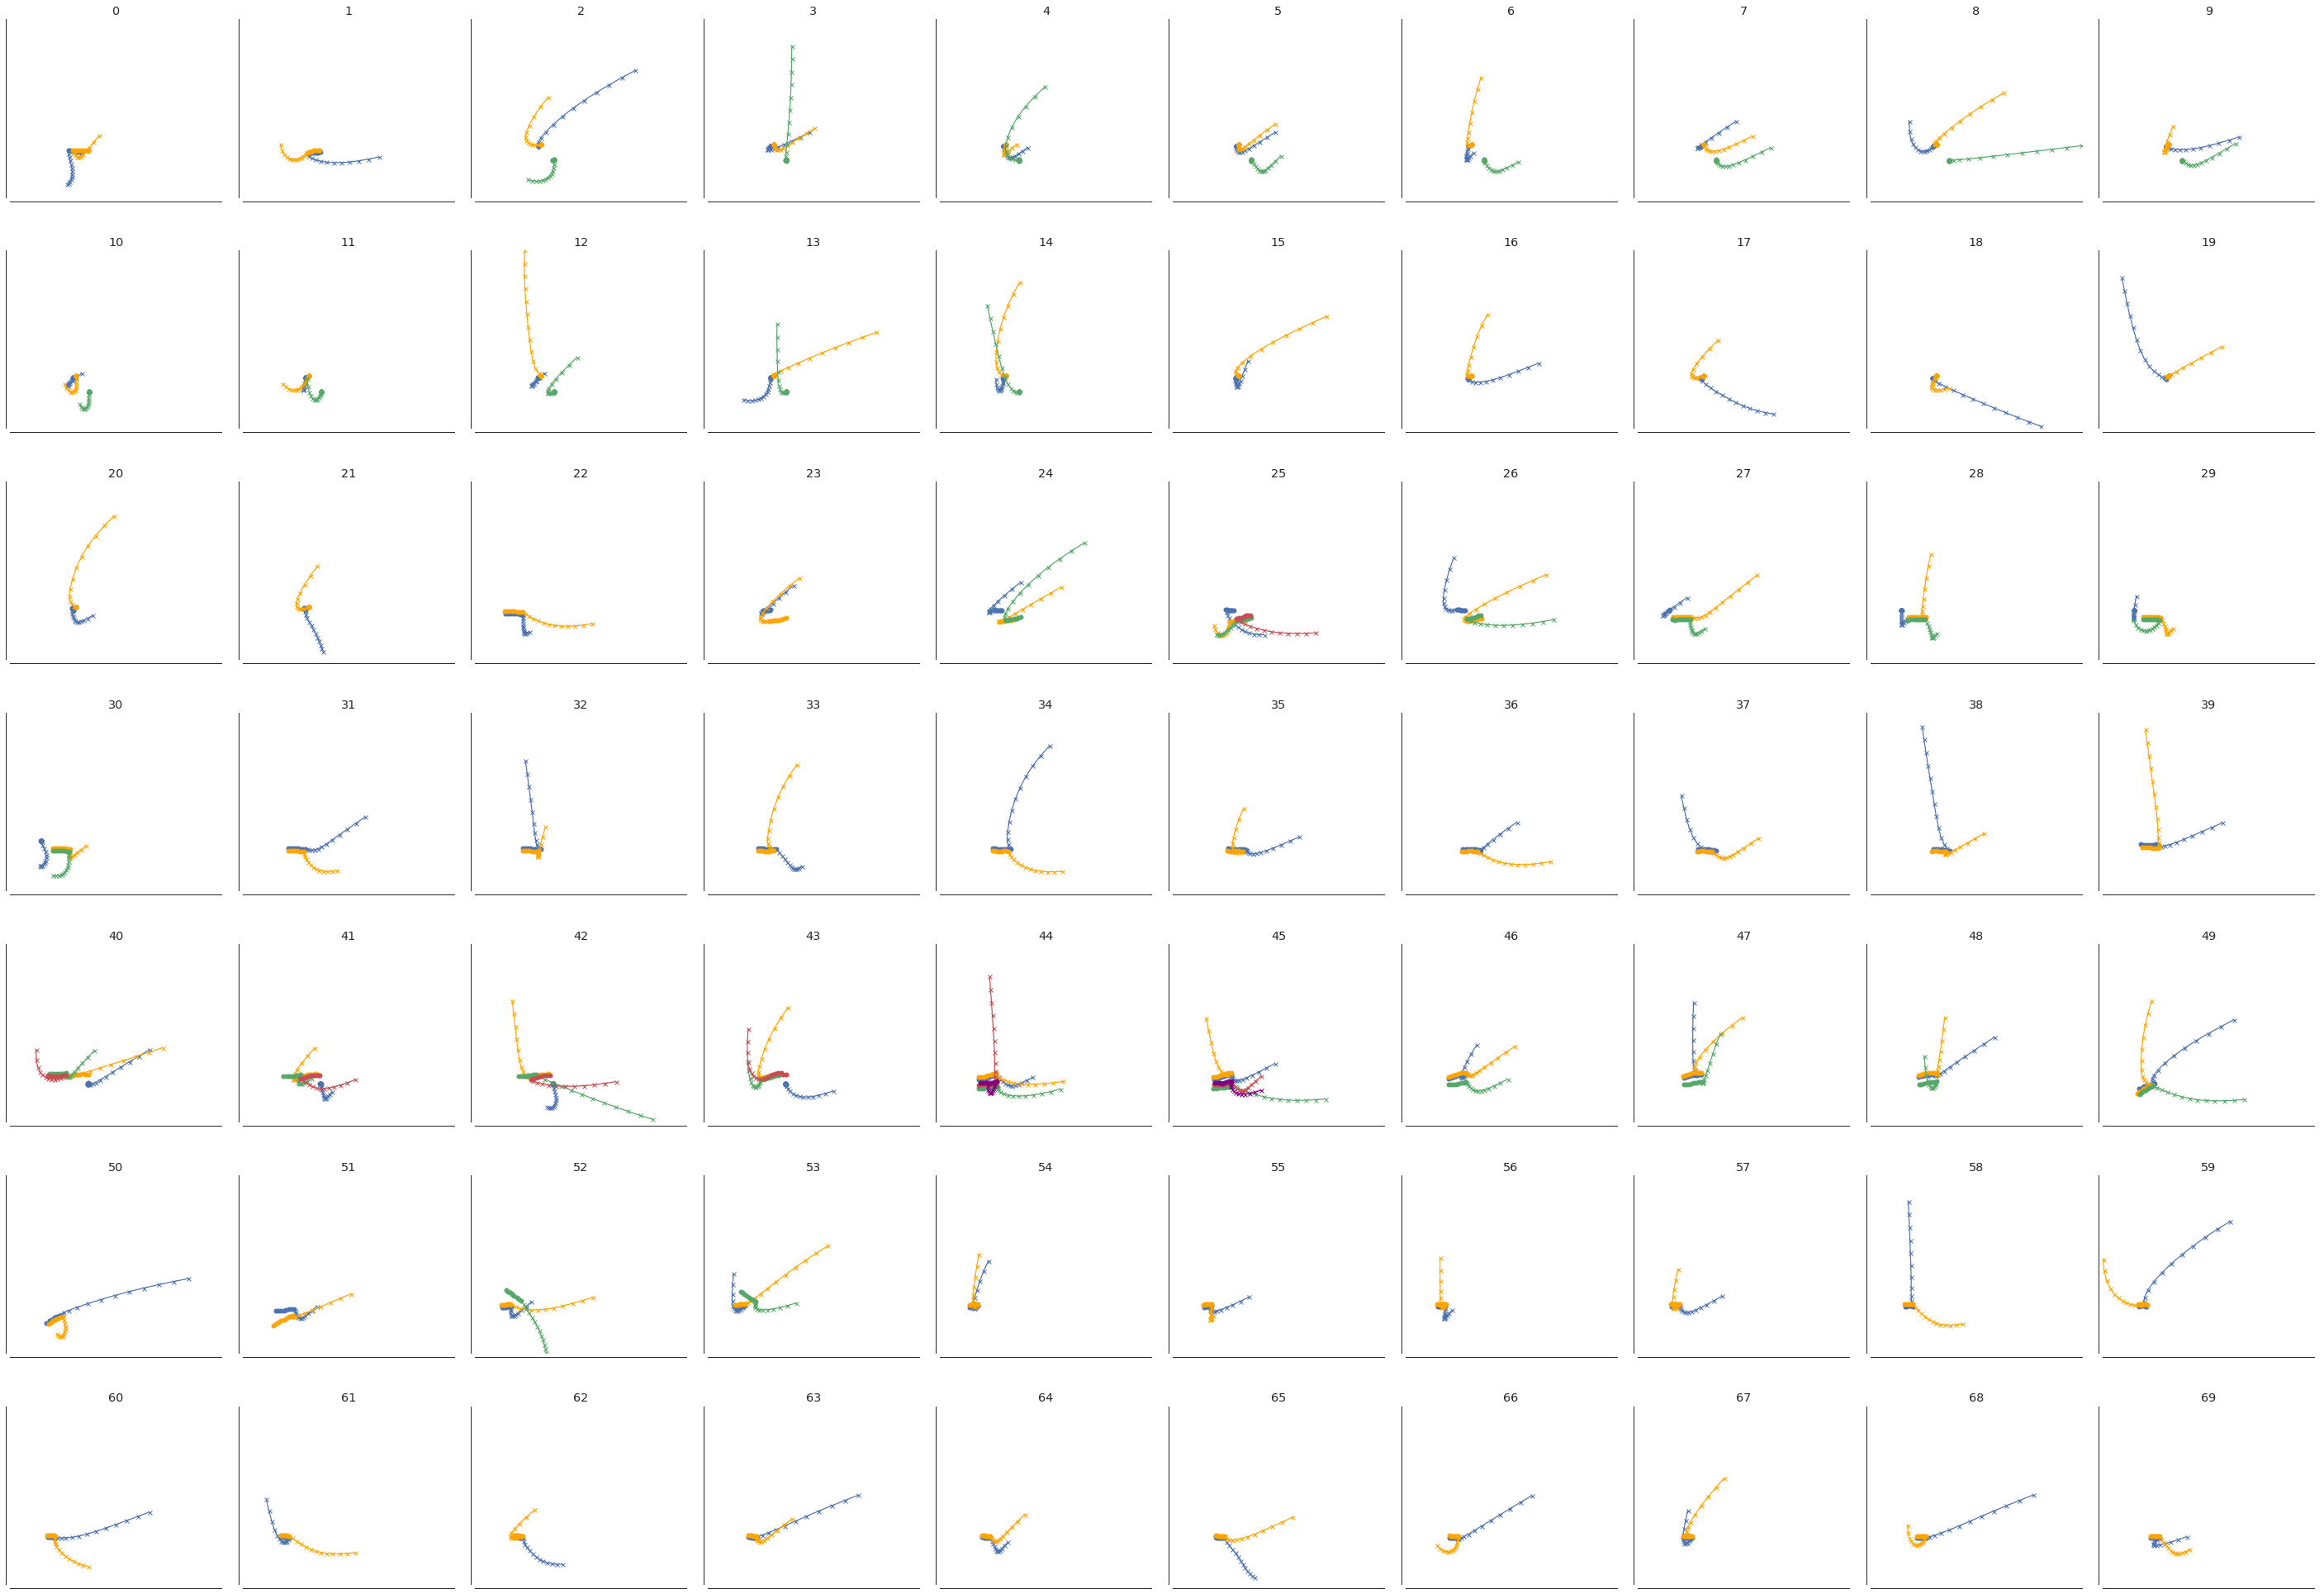

In [20]:
vis = Visualization()
ll = vis.trajectories(output)

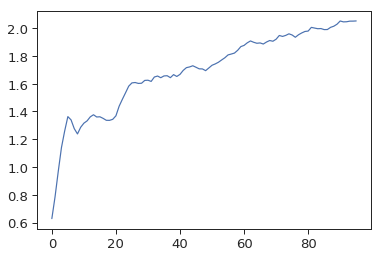

In [18]:
plt.plot(smooth_data(solver.train_loss_history['validation']['diversity']['scene_cos'], 5))

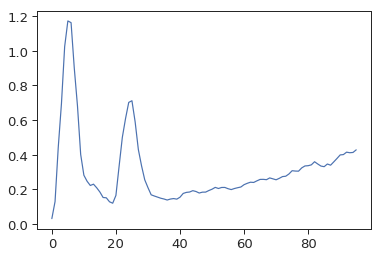

In [19]:
plt.plot(smooth_data(solver.train_loss_history['validation']['diversity']['agent_interp'], 5))

In [13]:
import matplotlib.pyplot as plt

In [15]:
from mapsgan.utils import smooth_data